<a href="https://colab.research.google.com/github/sanjibmandal0203/masters/blob/main/ANNover1025heartData.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
dataset = np.genfromtxt('/content/drive/MyDrive/Colab Notebooks/new/heart.csv', delimiter=",")

In [ ]:
print(dataset.shape)

(1026, 14)


In [ ]:
np.set_printoptions(formatter={'float':lambda x: "{0:0.2f}".format(x)})
print(dataset[0:5, :])

[[nan nan nan nan nan nan nan nan nan nan nan nan nan nan]
 [52.00 1.00 0.00 125.00 212.00 0.00 1.00 168.00 0.00 1.00 2.00 2.00 3.00
  0.00]
 [53.00 1.00 0.00 140.00 203.00 1.00 0.00 155.00 1.00 3.10 0.00 0.00 3.00
  0.00]
 [70.00 1.00 0.00 145.00 174.00 0.00 1.00 125.00 1.00 2.60 0.00 0.00 3.00
  0.00]
 [61.00 1.00 0.00 148.00 203.00 0.00 1.00 161.00 0.00 0.00 2.00 1.00 3.00
  0.00]]


In [ ]:
import random
np.random.shuffle(dataset)

In [ ]:
index_20persent = int(0.2 * len(dataset[:, 0]))
print(index_20persent)

205


In [ ]:
xval = dataset[:index_20persent, :-1]
yval = dataset[:index_20persent, -1]

xtrain = dataset[index_20persent:, 0:-1]
ytrain = dataset[index_20persent:, -1]

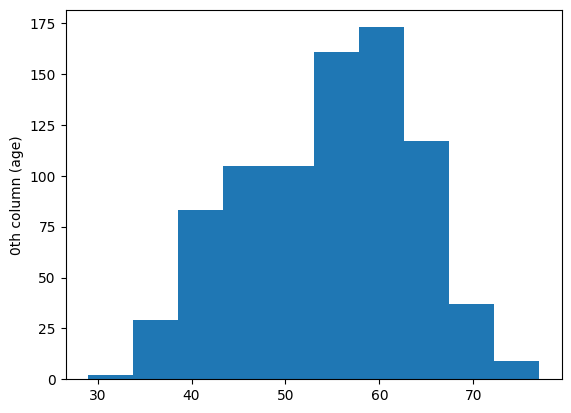

In [ ]:
import matplotlib.pyplot as plt

plt.hist(xtrain[:,0])
plt.ylabel('0th column (age)')
plt.show()

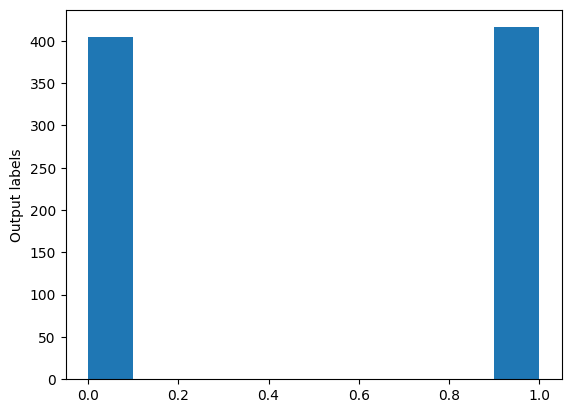

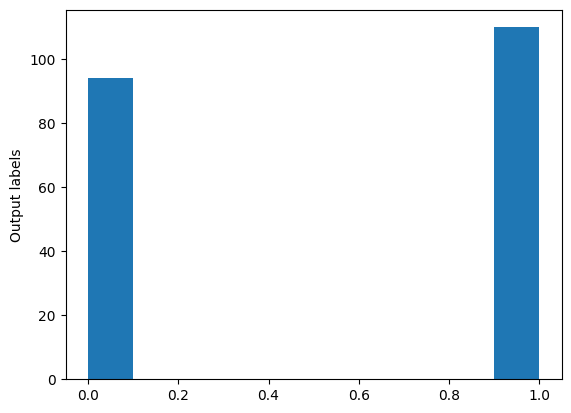

In [ ]:
plt.hist(ytrain)
plt.ylabel('Output labels')
plt.show()

plt.hist(yval)
plt.ylabel('Output labels')
plt.show()

In [ ]:
mean = xtrain.mean(axis=0)
xtrain -= mean
std = xtrain.std(axis=0)
xtrain /= std

xval -= mean
xval /= std

In [ ]:
print(mean)
print(std)

[54.48 0.69 0.94 131.48 246.43 0.15 0.53 148.64 0.35 1.10 1.38 0.75 2.33]
[8.95 0.46 1.03 17.86 51.28 0.36 0.53 22.48 0.48 1.18 0.62 1.02 0.62]


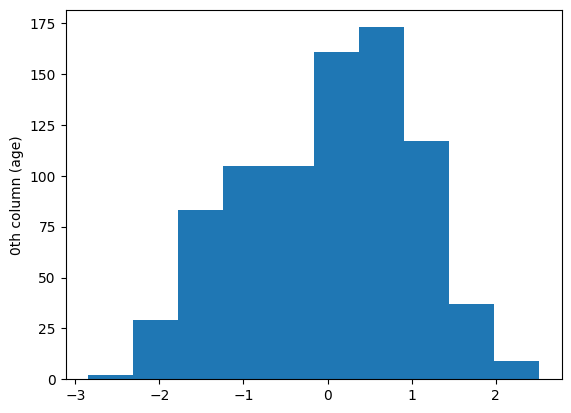

In [ ]:
plt.hist(xtrain[:,0])
plt.ylabel('0th column (age)')
plt.show()

In [ ]:
print(xtrain.shape)
print(ytrain.shape)
print(xval.shape)
print(yval.shape)
print(xtrain[0:3,])
print(ytrain[0:3])
print(xval[0:3,])
print(yval[0:3])

(821, 13)
(821,)
(205, 13)
(205,)
[[0.06 0.67 0.06 -0.08 0.30 -0.42 0.89 0.28 -0.74 -0.93 1.01 -0.74 -0.53]
 [2.52 0.67 -0.91 -0.36 1.12 -0.42 -0.99 0.59 1.35 -0.93 1.01 2.20 -0.53]
 [0.28 0.67 0.06 -0.42 0.28 -0.42 0.89 -0.34 -0.74 -0.68 1.01 -0.74 1.08]]
[1.00 0.00 0.00]
[[-1.17 0.67 0.06 -0.64 0.32 -0.42 0.89 1.08 -0.74 -0.93 1.01 -0.74 1.08]
 [-2.18 -1.49 -0.91 0.36 -1.24 -0.42 0.89 1.48 -0.74 0.25 1.01 -0.74
  -0.53]
 [0.62 0.67 -0.91 0.48 0.91 -0.42 -0.99 0.95 -0.74 0.09 -0.61 1.22 1.08]]
[1.00 1.00 0.00]


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Dense(8, input_dim = len(xtrain[0,:]), activation='relu'))
model.add(Dense(4, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
print(model.summary)

<bound method Model.summary of <Sequential name=sequential_2, built=True>>


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

In [ ]:
from keras.callbacks import EarlyStopping, ModelCheckpoint
callback_a = ModelCheckpoint(filepath = "/content/drive/MyDrive/Colab Notebooks/cardio_train/my_best_model.weights.h5", monitor='val_loss', save_best_only = True, save_weights_only = True)
callback_b = EarlyStopping(monitor='val_loss', mode='min', patience=20, verbose=1)

In [ ]:
history = model.fit(xtrain, ytrain, validation_data=(xval, yval), epochs=256, batch_size=10, callbacks = (callback_a, callback_b))

Epoch 1/256
83/83 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.5655 - loss: 0.7764 - val_accuracy: 0.7756 - val_loss: nan
Epoch 2/256
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7531 - loss: 0.5783 - val_accuracy: 0.8146 - val_loss: nan
Epoch 3/256
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7856 - loss: 0.4827 - val_accuracy: 0.8341 - val_loss: nan
Epoch 4/256
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8142 - loss: 0.4480 - val_accuracy: 0.8390 - val_loss: nan
Epoch 5/256
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8184 - loss: 0.4067 - val_accuracy: 0.8293 - val_loss: nan
Epoch 6/256
83/83 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8175 - loss: 0.3972 - val_accuracy: 0.8390 - val_loss: nan
Epoch 7/256
83/83 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8497 - loss: 0.3819 - val_accuracy: 0.8390 - val_loss: nan
Epoch 8/256
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8507 - loss: 0.3493 - val_accuracy: 0.8537 - val_loss: nan
Epoch 9/

In [ ]:
print(history.params)

{'verbose': 'auto', 'epochs': 256, 'steps': 83}


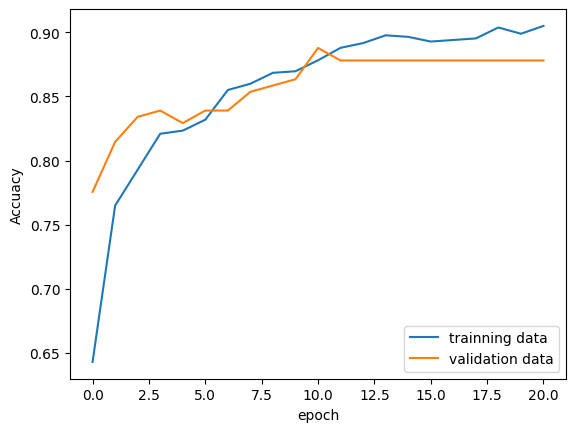

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylabel('Accuacy')
plt.xlabel('epoch')
plt.legend(['trainning data', 'validation data'], loc='lower right')
plt.show()

In [ ]:
scores =model.evaluate(xtrain, ytrain)  ## training data
print(model.metrics_names)
print(scores)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9073 - loss: 0.2759
['loss', 'compile_metrics']
[0.275055855512619, 0.9086480140686035]

compile_metrics: 90.86%
